# AMAZON_DATA_ANALYSIS_VISUALIZATION

__Importing the python libraries__

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

__Importing the dataset__

In [8]:
data=pd.read_csv("bestsellers with categories.csv")

In [9]:
data.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


# Exploratory data analysis

__Deep drive into dataset__

In [10]:
data.info

<bound method DataFrame.info of                                                   Name  \
0                        10-Day Green Smoothie Cleanse   
1                                    11/22/63: A Novel   
2              12 Rules for Life: An Antidote to Chaos   
3                               1984 (Signet Classics)   
4    5,000 Awesome Facts (About Everything!) (Natio...   
..                                                 ...   
545       Wrecking Ball (Diary of a Wimpy Kid Book 14)   
546  You Are a Badass: How to Stop Doubting Your Gr...   
547  You Are a Badass: How to Stop Doubting Your Gr...   
548  You Are a Badass: How to Stop Doubting Your Gr...   
549  You Are a Badass: How to Stop Doubting Your Gr...   

                       Author  User Rating  Reviews  Price  Year        Genre  
0                    JJ Smith          4.7    17350      8  2016  Non Fiction  
1                Stephen King          4.6     2052     22  2011      Fiction  
2          Jordan B. Peterson  

In [11]:
data.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


In [12]:
data.shape

(550, 7)

In [13]:
data.dtypes

Name            object
Author          object
User Rating    float64
Reviews          int64
Price            int64
Year             int64
Genre           object
dtype: object

__Checking for null values__

In [14]:
data.isnull().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

__Checking for number of unique books name__

In [52]:
data['Name'].nunique()

351

__RENAMING__

In [15]:
data.rename(columns={"User Rating":"User_Rating"},inplace=True)

# VISUALIZATION_PART

__PLOTING OF Top Rated Book With Rost reviews__

[Text(0.5, 1.0, 'Top Rated Book With Rost reviews')]

E:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 146 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 146 missing from current font.
  font.set_text(s, 0, flags=flags)


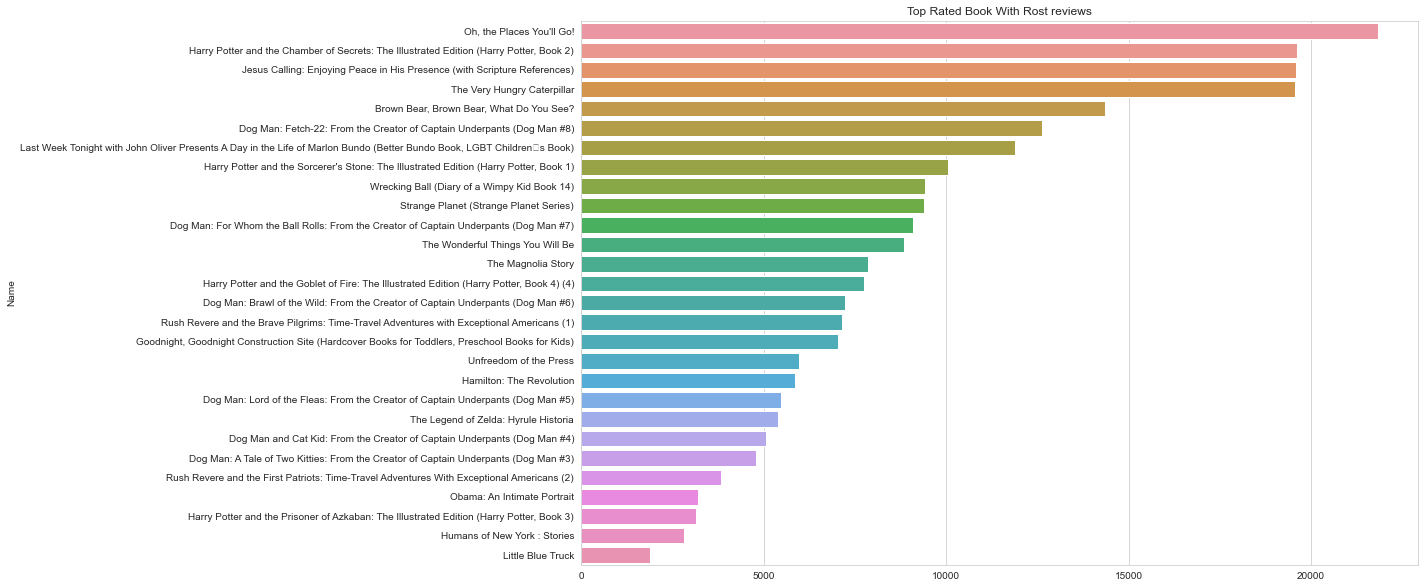

In [35]:
X=data[data["User_Rating"]==4.9]
Y= X.groupby("Name").Reviews.mean().sort_values(ascending= False)
plt.figure(figsize= (15,10))
sns.set_style("whitegrid")
sns.barplot(x=Y.values,y=Y.index).set(title="Top Rated Book With Rost reviews")

# Ploting for most expensive Books




[Text(0.5, 1.0, 'most expensive Books')]

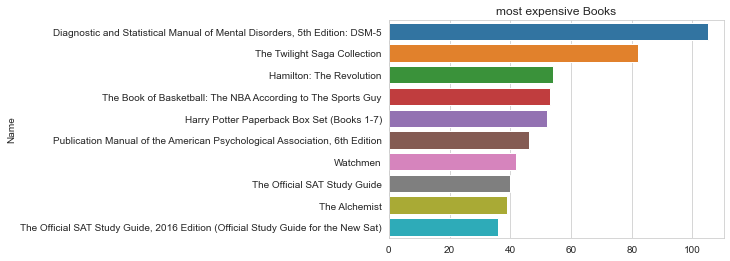

In [36]:
most_exp=data.groupby("Name")["Price"].mean().sort_values(ascending= False).head(10)
sns.barplot(x=most_exp.values,y=most_exp.index).set(title="most expensive Books")

# Ploting for User Ratings and Price Relation

[Text(0.5, 1.0, 'User Ratings and Price Relation')]

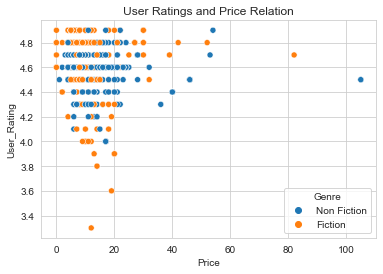

In [34]:
sns.scatterplot(x="Price",y= "User_Rating",data= data,hue= "Genre").set(title="User Ratings and Price Relation")

# Ploting for  Most Top Rated With Most Reviews

[Text(0.5, 1.0, 'Most Top Rated With Most Reviews')]

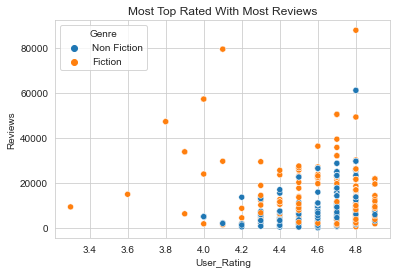

In [37]:
sns.scatterplot(x="User_Rating",y= "Reviews",data= data,hue= "Genre").set(title="Most Top Rated With Most Reviews")

# violin plot ratings based on genres

<AxesSubplot:xlabel='Genre', ylabel='User_Rating'>

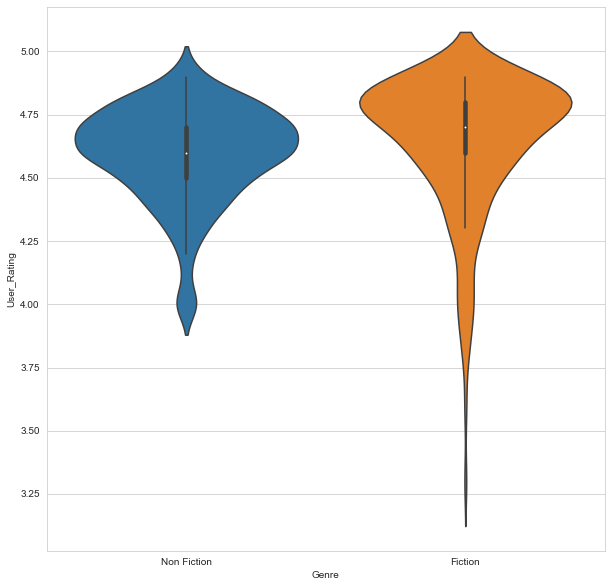

In [38]:
plt.figure(figsize= (10,10))
sns.violinplot(x= "Genre",y= "User_Rating",data= data)

# Top rated free books

E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='Name'>

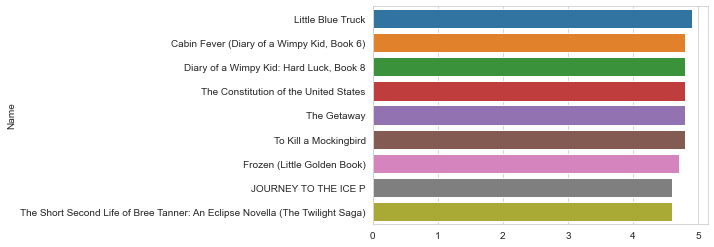

In [39]:
x= data[data["Price"]==0]
y= x.groupby("Name").User_Rating.mean().sort_values(ascending = False).head(20)
sns.barplot(y.values,y.index)

# Top rated authors

E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Ratings')

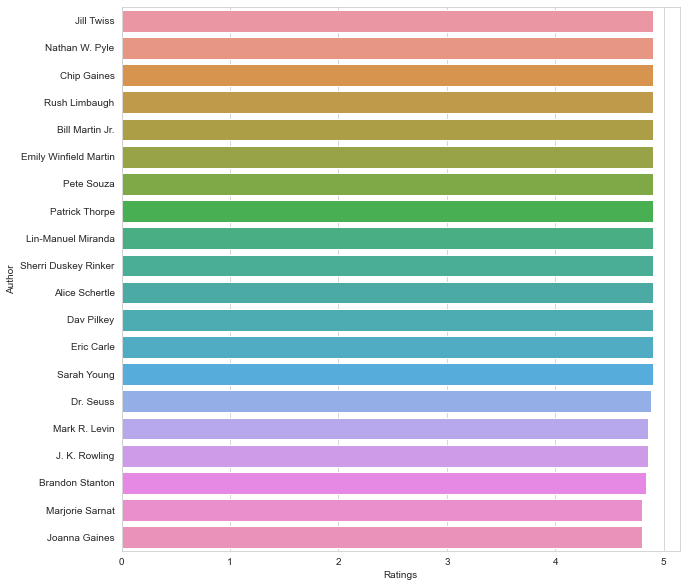

In [42]:
b= data.groupby("Author").User_Rating.mean().sort_values(ascending= False).head(20)
plt.figure(figsize= (10,10))
plot= sns.barplot(b.values,b.index)
plot.set_xlabel("Ratings")

# Reviews over the years

<AxesSubplot:xlabel='Year', ylabel='Reviews'>

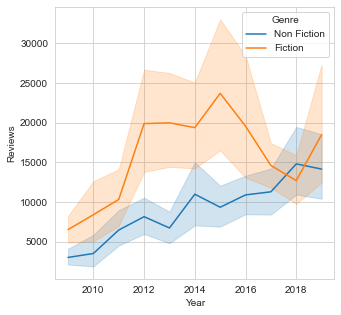

In [44]:
plt.figure(figsize= (5,5))
sns.lineplot(x= "Year",y= "Reviews",data= data,hue="Genre")

# Boxplot Groupby Genre

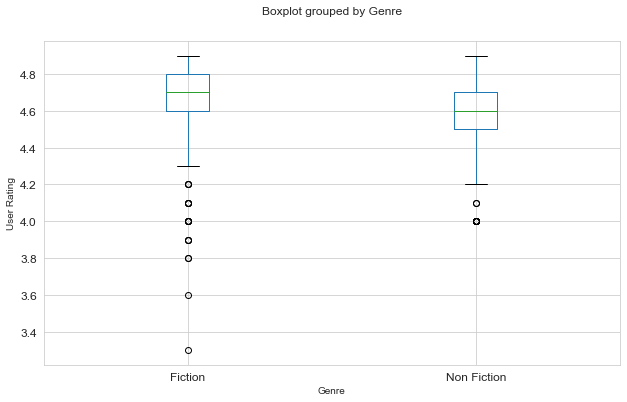

In [47]:
ax = data.boxplot('User_Rating', 'Genre', figsize=(10,6), fontsize=12)
ax.set_ylabel('User Rating')
ax.set_title('');

# Boxplot groupby year

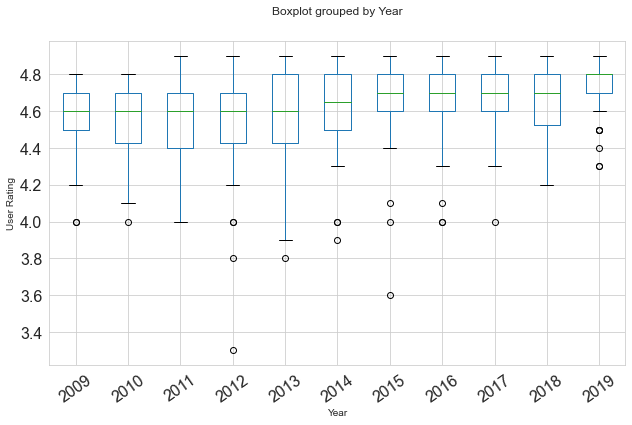

In [55]:
ax = data.boxplot('User_Rating', 'Year', figsize=(10,6), fontsize=16, rot=35)
ax.set_ylabel('User Rating')
ax.set_title('');

# The End!